이상치

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

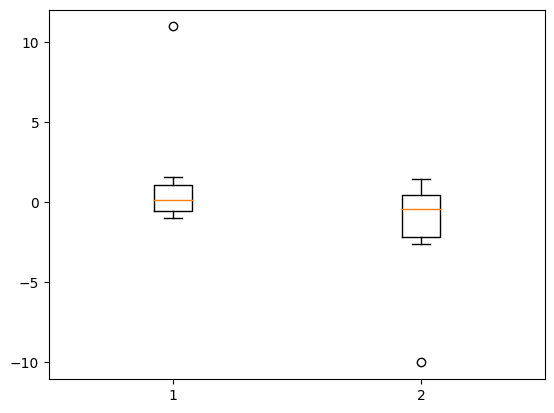

In [5]:
df = pd.DataFrame(np.random.randn(8,3), columns=['c1','c2','c3'])
df.loc[1,'c1'] = 11
df.loc[3,'c3'] = -10
# 박스플롯으로 시각화
plt.boxplot([df['c1'],df['c3']])
plt.show()

데이터 전처리 방법
  - 목적에 맞는 변수 추출
    - 상관분석과 주성분 분석
      - 상관분석:corr()
      - 주성분 분석은 pca를 이용

<Axes: >

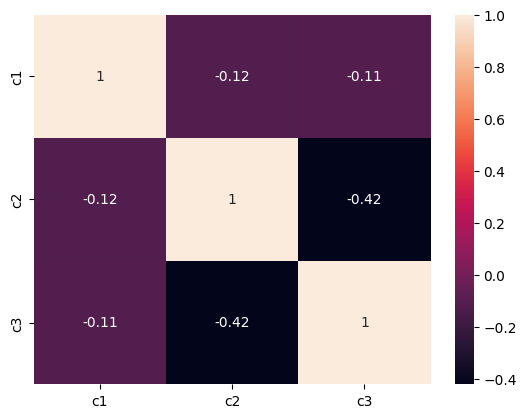

In [8]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)
pca_result

array([[-3.10494965, -0.96273827],
       [ 8.98914055, -3.39945894],
       [-1.82727684, -2.44322226],
       [ 2.51855818,  8.18083147],
       [-2.23733258, -0.50633485],
       [-0.90971031,  1.06204536],
       [-3.03772337, -0.5966829 ],
       [-0.39070598, -1.33443962]])

no show환자들의 특징을 파악해서 발생률을 줄일수 있는 아이디어를 제시

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/medical.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [13]:
# AppointmentDay ; 병원에 머무른 날, Neighbourhood:병원 위치

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


통계량을 이용하여 이상치 제거

In [17]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [19]:
df = df[df.Age>0]
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472809e+14,5.675434e+06,38.316085,0.323264
std,2.558256e+14,7.133274e+04,22.466214,0.467725
min,3.920000e+04,5.030230e+06,1.000000,0.000000
25%,4.170000e+12,5.640490e+06,19.000000,0.000000
50%,3.170000e+13,5.680744e+06,38.000000,0.000000
75%,9.430000e+13,5.725634e+06,56.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


수치형 데이터 변환

In [23]:
df['No-show'] = df['No-show'].map({'Yes':1,'No':0})
df['No-show'].value_counts()

0    85307
1    21680
Name: No-show, dtype: int64

datetime으로 변환 : to_datetime()

In [26]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   SMS_received    106987 non-null  int64              
 8   No-show         106987 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.2+ MB


새로운 변수(특성) 추가
  - 환자가 예약하고 실제 방문까지의 기간을 추가

In [31]:
df['waiting_day'] =  df['AppointmentDay'].dt.dayofyear - df['ScheduledDay'].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   SMS_received    106987 non-null  int64              
 8   No-show         106987 non-null  int64              
 9   waiting_day     106987 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(2)
memory usage: 9.0+ MB


In [32]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472809e+14,5.675434e+06,38.316085,0.323264,0.202641,9.955200
std,2.558256e+14,7.133274e+04,22.466214,0.467725,0.401969,15.627039
min,3.920000e+04,5.030230e+06,1.000000,0.000000,0.000000,-223.000000
25%,4.170000e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680744e+06,38.000000,0.000000,0.000000,4.000000
75%,9.430000e+13,5.725634e+06,56.000000,1.000000,0.000000,14.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,146.000000


waiting_day가 0이상인 데이터만 추출 - 이상치 제거

In [33]:
df = df[df.waiting_day>=0]
df.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.069200e+05,1.069200e+05,106920.000000,106920.000000,106920.000000,106920.000000
mean,1.472720e+14,5.675744e+06,38.301880,0.323064,0.202544,10.076917
std,2.558089e+14,7.018444e+04,22.461553,0.467649,0.401897,14.796687
min,3.920000e+04,5.209081e+06,1.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640560e+06,19.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680786e+06,38.000000,0.000000,0.000000,4.000000
75%,9.430000e+13,5.725676e+06,56.000000,1.000000,0.000000,14.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,146.000000


Age 이상치를 boxplot으로 확인

<Axes: xlabel='Age'>

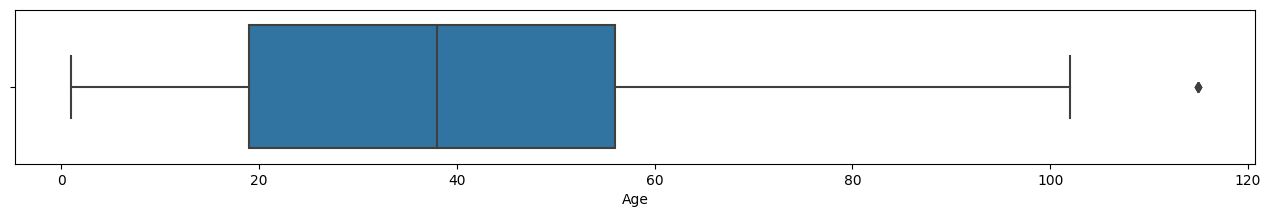

In [38]:
plt.figure(figsize=(16,2))
sns.boxplot(x = df.Age)

<Axes: xlabel='Age'>

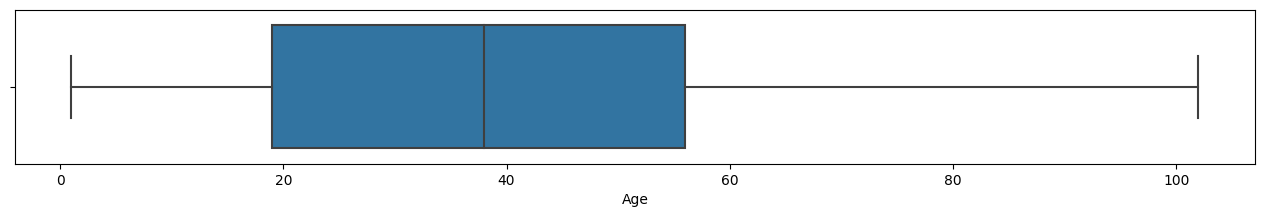

In [42]:
df = df[df.Age <= 110]
plt.figure(figsize=(16,2))
sns.boxplot(x = df.Age)

당일 예약 건수 중 노쇼 비율

In [49]:
a = len(df[df.waiting_day == 0])
b = len(df[(df.waiting_day == 0) & (df['No-show'] == 1)])
b/a

0.04686028046187387

데이터 분할

In [50]:
no_show = df[df['No-show']==1]
show = df[df['No-show']==0]

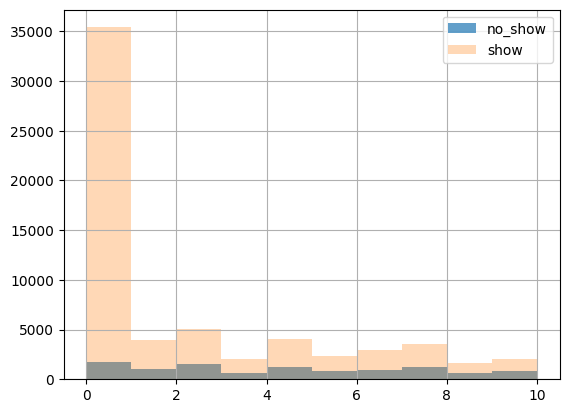

In [53]:
# 기다린 날이 10일 이하
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='show')
plt.legend()
plt.show()

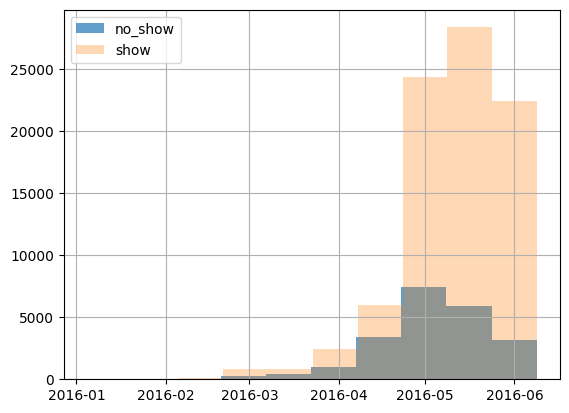

In [55]:
# 예약날짜 에 대한 show / no_show
no_show['ScheduledDay'].hist(alpha=0.7,label='no_show')
show['ScheduledDay'].hist(alpha=0.3,label='show')
plt.legend()
plt.show()

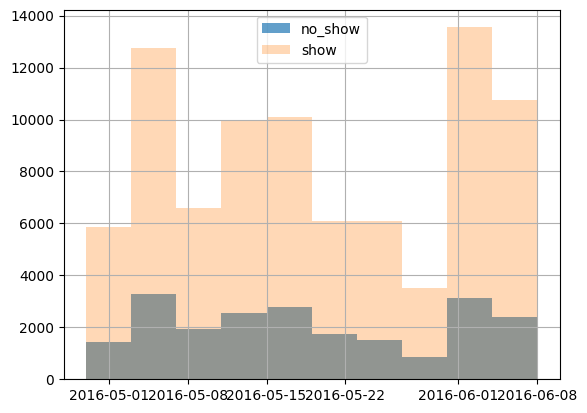

In [56]:
# 실제방문 에 대한 show / no_show
no_show['AppointmentDay'].hist(alpha=0.7,label='no_show')
show['AppointmentDay'].hist(alpha=0.3,label='show')
plt.legend()
plt.show()

재방문 환자와 no-show
  - 환자의 병원 예약 횟수
    - 환자 번호로 value_counts()함수 이용

<Axes: >

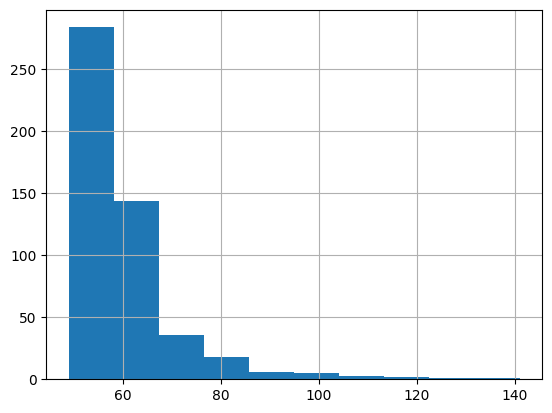

In [63]:
# 상위 500명 환자의 예약 횟수 분포
df.PatientId.value_counts().iloc[:500].hist()

상위 10명 환자의 방문 횟수 확인

In [64]:
df.PatientId.value_counts().iloc[:10]

8.220000e+14    141
3.350000e+13    124
7.580000e+13    122
2.690000e+13    117
8.190000e+13    113
6.540000e+13    111
6.680000e+13    106
1.450000e+13    104
8.530000e+14    101
8.920000e+13    101
Name: PatientId, dtype: int64

환자별로 기다리는 기간에 따른 노쇼 발생 건수 확인

In [65]:
# waiting_day 50일 이상인경우 환자별 노쇼의 발생 횟수

In [70]:
df[(df['waiting_day'] >=50) & (df['No-show']==1)].PatientId.value_counts().iloc[:10]

3.380000e+14    6
7.250000e+13    4
8.340000e+12    4
4.180000e+12    3
3.760000e+13    3
9.150000e+14    3
4.720000e+13    3
1.550000e+11    3
8.460000e+12    3
9.460000e+14    3
Name: PatientId, dtype: int64

알림 메세지 허용 여부와 기다리는 기간에 따른 노쇼 발생 횟수 확인

<Axes: xlabel='SMS_received', ylabel='waiting_day'>

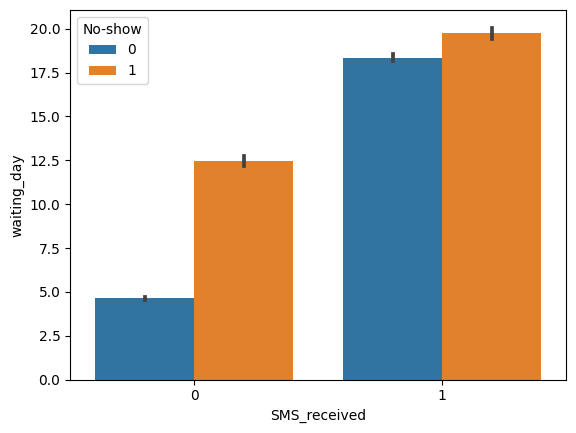

In [73]:
sns.barplot(data=df, x='SMS_received', y='waiting_day',hue='No-show')

In [74]:
# SNS_received 에 따른 No-show 비율 파악

In [76]:
# sns을 허용하지 않을때 noshow
# sns을 허용하지 않을때 show
a = len(df[(df['SMS_received'] == 0) &(df['No-show'] == 1)])
b = len(df[(df['SMS_received'] == 0) &(df['No-show'] == 0)])
print(f'SMS_received가 0일때 노쇼 : {a}')
print(f'SMS_received가 0일때 쇼 : {b}')
print(f'SMS_received가 0일때 노쇼비율 : {a / (a+b)}')

a = len(df[(df['SMS_received'] == 1) &(df['No-show'] == 1)])
b = len(df[(df['SMS_received'] == 1) &(df['No-show'] == 0)])
print(f'SMS_received가 1일때 노쇼 : {a}')
print(f'SMS_received가 1일때 쇼 : {b}')
print(f'SMS_received가 1일때 노쇼비율 : {a / (a+b)}')


SMS_received가 0일때 노쇼 : 12099
SMS_received가 0일때 쇼 : 60275
SMS_received가 0일때 노쇼비율 : 0.1671732942769503
SMS_received가 1일때 노쇼 : 9554
SMS_received가 1일때 쇼 : 24987
SMS_received가 1일때 노쇼비율 : 0.27659882458527546


In [77]:
# SMS_received, waiting_day, No-show 간의 상관관계 heatmap을 사용

<Axes: >

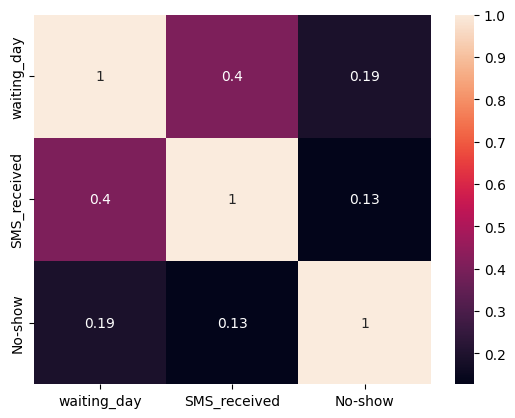

In [80]:
temp = df[['waiting_day','SMS_received','No-show']].corr()
sns.heatmap(temp, annot=True)

<Axes: xlabel='No-show', ylabel='count'>

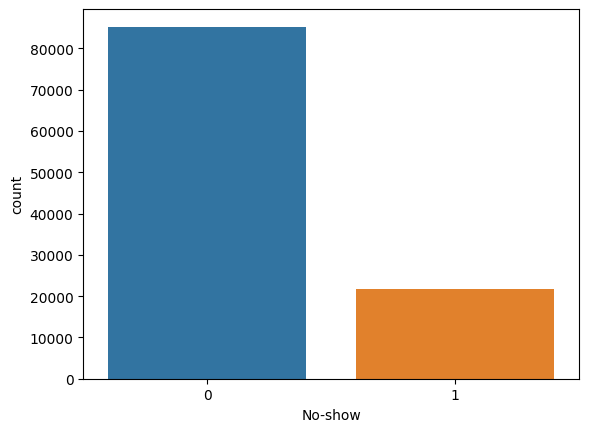

In [82]:
# 노쇼의 갯수를 bar형태로 0 과 1
sns.countplot(data=df, x='No-show')

<Axes: xlabel='No-show', ylabel='count'>

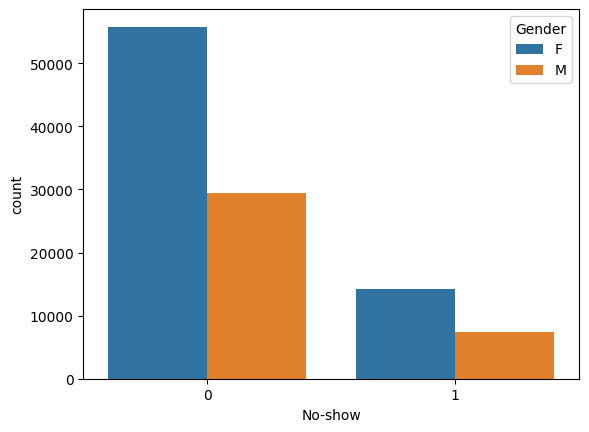

In [84]:
# 성별에 따른 no-show 시각화
sns.countplot(data=df, x='No-show',hue='Gender')

In [95]:
# 노쇼의 여성과 남성비율
F_count = no_show.groupby(['Gender'])['PatientId'].count().loc['F']
M_count = no_show.groupby(['Gender'])['PatientId'].count().loc['M']
print(f'여성 : {F_count}  {F_count / (F_count+M_count)}')
print(f'남성 : {M_count}  {M_count / (F_count+M_count)}')

여성 : 14258  0.6584768854200341
남성 : 7395  0.3415231145799658
